<a href="https://colab.research.google.com/github/H3nr1que26/Pedro/blob/main/Atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caregar as bibliotecas que serão utilizadas

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import math
from math import sqrt, pi, exp
from scipy.stats import norm

Caregar os dadso

In [48]:
arquivo = 'https://raw.githubusercontent.com/H3nr1que26/Pedro/main/titanic.csv'
RLI = pd.read_csv(arquivo)
RLI.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Verificando as infromações do docuemnto

In [49]:
RLI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


Valores vazios

In [50]:
RLI.isna().sum().to_frame('Valor Vazio')

,Valor Vazio
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


Subustituindo valores de string para int

In [51]:
Name = RLI["Name"].drop_duplicates()

Name

0                                 Mr. Owen Harris Braund
1      Mrs. John Bradley (Florence Briggs Thayer) Cum...
2                                  Miss. Laina Heikkinen
3            Mrs. Jacques Heath (Lily May Peel) Futrelle
4                                Mr. William Henry Allen
                             ...                        
882                                 Rev. Juozas Montvila
883                          Miss. Margaret Edith Graham
884                       Miss. Catherine Helen Johnston
885                                 Mr. Karl Howell Behr
886                                   Mr. Patrick Dooley
Name: Name, Length: 887, dtype: object

In [52]:
Sex = RLI["Sex"].drop_duplicates()

Sex 

0      male
1    female
Name: Sex, dtype: object

In [53]:
RLI['Sex'].replace( {'female':1, 'male':0}, inplace=True)

RLI.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500


Eliminando colunas que não serão utilizadas

In [54]:
RLI = RLI.drop(columns = ['Name'])

RLI

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,0,27.0,0,0,13.0000
883,1,1,1,19.0,0,0,30.0000
884,0,3,1,7.0,1,2,23.4500
885,1,1,0,26.0,0,0,30.0000


In [42]:
RLI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    int64  
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.6 KB


Selecionar o dados alvo e os dados que servirão de parametro

In [55]:
objetivo = "Fare"

objetivo

'Fare'

Analise da distribuição dos dados de controle

In [56]:
total = RLI.groupby(objetivo).agg(Contagem = (objetivo,'count')).reset_index()
total['Percentual (%)'] = 100*total['Contagem']/total['Contagem'].sum()
total.head()

,Fare,Contagem,Percentual (%)
0,0.0000,15,1.691094
1,4.0125,1,0.112740
2,5.0000,1,0.112740
3,6.2375,1,0.112740
4,6.4375,1,0.112740


Separando os dados

In [57]:
x = RLI.drop( columns = [objetivo], axis = 1 )

x

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0
...,...,...,...,...,...,...
882,0,2,0,27.0,0,0
883,1,1,1,19.0,0,0
884,0,3,1,7.0,1,2
885,1,1,0,26.0,0,0


In [58]:
y = RLI[objetivo]
y

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
882    13.0000
883    30.0000
884    23.4500
885    30.0000
886     7.7500
Name: Fare, Length: 887, dtype: float64

Treinar o modelo para que ele possa predizer os dados

In [106]:
X_train, X_test, y_train, y_test = train_test_split ( x, y, test_size = 0.7, random_state = 15)

Testando o modelo para que se possa analisar sua eficiência preditiva

In [107]:
LR = LinearRegression().fit(X_train, y_train)

Metricas de efiência do modelo


1.   Acurária de Treino 
2.   Acurária de Teste



In [108]:
print("Acc Treino:", LR.score(X_train, y_train))
print("Acc Teste:", LR.score(X_test, y_test))

Acc Treino: 0.5372375676409217
Acc Teste: 0.27917050723764225


Dados de testes e suas métricas de efiência




In [109]:
y_predito = LR.predict(X_test)
y_predito

array([-6.61045904e-01, -6.18103677e+00,  7.06124578e+01,  9.07500518e+01,
        3.26850710e+01,  6.53825244e+00,  6.87804155e+01,  7.45501838e+01,
        5.68521627e+01,  7.73543276e+01,  2.30435902e+01, -2.33687836e+00,
        9.92420625e+00,  8.89764007e+01,  1.62997709e+00,  1.50590818e+01,
        6.23440154e+01,  8.31517161e+01,  4.78200460e+01,  7.38406496e+01,
        3.05510339e+01,  3.34529964e+01,  3.07037688e+01, -3.86422702e+00,
        1.01903762e+00,  4.17171877e+01,  6.52717646e+01,  6.38713640e+01,
        6.94152653e+01,  6.40240989e+01,  6.21912805e+01,  4.13867734e+01,
        2.55363292e-01,  2.57139699e+00, -6.15950108e+00, -3.55576172e-01,
        2.19033588e+00, -3.25328756e+00,  1.01903762e+00,  6.23278271e+00,
        1.17177249e+00, -8.13780770e-01,  4.58633641e+01,  3.36014802e+01,
        5.73076916e+01,  3.05907930e+01, -7.70838543e+00, -2.18839456e+00,
        1.09883232e+01,  3.40596848e+01,  6.89570607e+01,  3.85140066e+01,
        7.12233973e+01,  

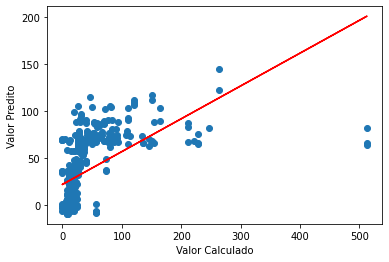

In [110]:
plt.scatter(y_test, y_predito)
plt.xlabel('Valor Calculado')
plt.ylabel('Valor Predito')
z = np.polyfit(y_test, y_predito, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), "r-")
plt.show();

Métricas de erro

In [111]:
print('MAE.:', metrics.mean_absolute_error(y_test, y_predito) )
print('MSE.:', metrics.mean_squared_error(y_test, y_predito))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predito)))

MAE.: 23.219095504512147
MSE.: 1894.4374182457705
RMSE: 43.52513547647808


In [112]:
saida = x.copy()
saida['real'] = y.copy()
saida['predito LR'] = LR.predict(x)
saida['AE'] = np.absolute(saida['real'] - saida['predito LR']) 
saida['MAE'] = metrics.mean_absolute_error(saida['real'], saida['predito LR']) 
saida['MSE'] = metrics.mean_squared_error(saida['real'], saida['predito LR']) 
saida['RMSE'] = np.sqrt(metrics.mean_squared_error(saida['real'], saida['predito LR'])) 
saida['real std'] = np.std(saida['real']) 
saida['predito LR std'] = np.std(saida['predito LR']) 
saida['r2 score'] = metrics.r2_score(saida['real'], saida['predito LR']) 
saida.sort_values(by=['AE'],ascending=False) 

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,real,predito LR,AE,MAE,MSE,RMSE,real std,predito LR std,r2 score
733,1,1,0,35.0,0,0,512.3292,63.871364,448.457836,22.32922,1620.286992,40.252789,49.75397,33.288685,0.34546
257,1,1,1,35.0,0,0,512.3292,66.340909,445.988291,22.32922,1620.286992,40.252789,49.75397,33.288685,0.34546
676,1,1,0,36.0,0,1,512.3292,81.751316,430.577884,22.32922,1620.286992,40.252789,49.75397,33.288685,0.34546
297,1,1,1,50.0,0,1,247.5208,82.082572,165.438228,22.32922,1620.286992,40.252789,49.75397,33.288685,0.34546
378,1,1,1,42.0,0,0,227.5250,65.271765,162.253235,22.32922,1620.286992,40.252789,49.75397,33.288685,0.34546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0,3,0,22.0,1,0,7.7500,7.149192,0.600808,22.32922,1620.286992,40.252789,49.75397,33.288685,0.34546
159,0,3,0,44.0,0,1,16.1000,15.691557,0.408443,22.32922,1620.286992,40.252789,49.75397,33.288685,0.34546
0,0,3,0,22.0,1,0,7.2500,7.149192,0.100808,22.32922,1620.286992,40.252789,49.75397,33.288685,0.34546
112,0,3,1,20.0,1,0,9.8250,9.924206,0.099206,22.32922,1620.286992,40.252789,49.75397,33.288685,0.34546


Para esse problema especifico podemos ocnstatar que a regressão linear não é um modelo eficiênte no que tange a predição doresultado correto, testes com outros modelos serão realizados posteriormente.



